In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

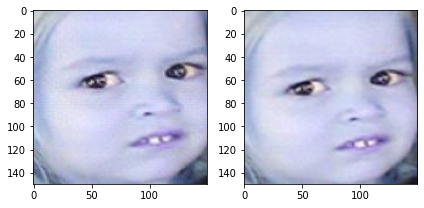

In [ ]:
img1 = cv.imread('/content/drive/MyDrive/Machine Learning Colab/data/OCR/train/disgust_filter/3f5e9a0e4b97c5ce90013913630d23b5e90362588724578d66eacac7.jpg')
img2 = cv.imread('/content/drive/MyDrive/Machine Learning Colab/data/OCR/train/disgust_filter/6a0c3c295f3b65a1a49e555afd0e586bc90e2d6ddae0dbd9583c168b.jpg')
fig = plt.figure()
fig1 = fig.add_subplot(1,2,1)
fig2 = fig.add_subplot(1,2,2)

fig1.imshow(img1)
fig2.imshow(img2)

plt.tight_layout()
plt.show()

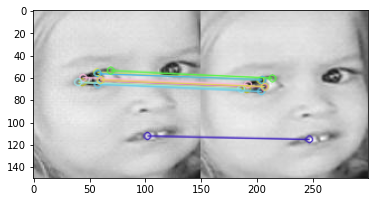

(<matplotlib.image.AxesImage at 0x7f7c83a80510>, None)

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('/content/drive/MyDrive/Machine Learning Colab/data/OCR/train/disgust_filter/3f5e9a0e4b97c5ce90013913630d23b5e90362588724578d66eacac7.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/drive/MyDrive/Machine Learning Colab/data/OCR/train/disgust_filter/6a0c3c295f3b65a1a49e555afd0e586bc90e2d6ddae0dbd9583c168b.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [ ]:
for match in matches:
    print(match.distance)

dis = [x.distance for x in matches]
print(np.mean(dis))

5.0
8.0
10.0
10.0
11.0
11.0
12.0
12.0
12.0
13.0
13.0
13.0
15.0
15.0
15.0
15.0
15.0
16.0
17.0
17.0
18.0
19.0
19.0
20.0
20.0
20.0
21.0
23.0
23.0
28.0
28.0
29.0
30.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
33.0
38.0
40.0
40.0
40.0
41.0
42.0
55.0
22.9375


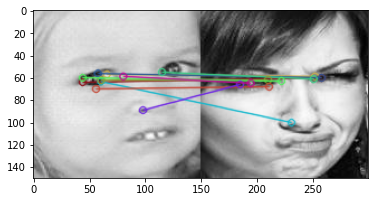

(<matplotlib.image.AxesImage at 0x7f7ce4200c10>, None)

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('/content/drive/MyDrive/Machine Learning Colab/data/OCR/train/disgust_filter/3f5e9a0e4b97c5ce90013913630d23b5e90362588724578d66eacac7.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/drive/MyDrive/Machine Learning Colab/data/OCR/train/disgust_filter/3f1f434564b3b6307e9b72f11573c357c89f1a91bbdbba5b0a5c40ea.jpg',cv.IMREAD_GRAYSCALE)          # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [ ]:
for match in matches:
    print(match.distance)

dis = [x.distance for x in matches]
print(np.mean(dis))

38.0
39.0
40.0
46.0
46.0
47.0
52.0
53.0
61.0
62.0
62.0
63.0
63.0
63.0
69.0
72.0
54.75


중복 이미지 검출 테스트(ORB)

,Disatance_mean,Num
count,3012.000000,3012.000000
mean,55.465819,16.447543
std,7.696437,6.023057
min,0.000000,1.000000
25%,50.944444,13.000000
50%,54.818182,16.000000
75%,59.483696,20.000000
max,107.750000,77.000000


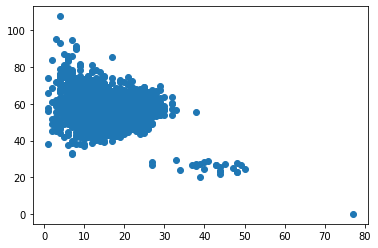

In [2]:
import os
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_dir = '/content/drive/MyDrive/Machine Learning Colab/data/OCR/train/disgust_filter'
result = list()
error_list = list()

# Initiate ORB detector
orb = cv.ORB_create()

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# queryImage
img1 = cv.imread(os.path.join(base_dir, '3f5e9a0e4b97c5ce90013913630d23b5e90362588724578d66eacac7.jpg' ),cv.IMREAD_GRAYSCALE)
kp1, des1 = orb.detectAndCompute(img1,None)

for fname in os.listdir(base_dir):
    img2 = cv.imread(os.path.join(base_dir, fname),cv.IMREAD_GRAYSCALE)          # trainImage

    # find the keypoints and descriptors with ORB
    kp2, des2 = orb.detectAndCompute(img2,None)

    # Match descriptors.
    try:
        matches = bf.match(des1,des2)
    except:
        error_list.append(fname)
    finally:
        dis = [x.distance for x in matches]
        result.append([fname, np.mean(dis), len(dis)])


data = pd.DataFrame(result, columns=['File_name', 'Disatance_mean', 'Num'])
display(data.describe())

plt.scatter(data['Num'] ,data['Disatance_mean'])
plt.show()

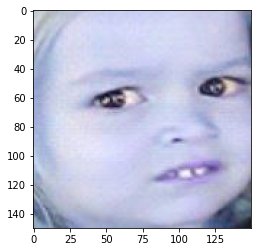

In [ ]:
test_img = cv.imread(os.path.join(base_dir, data.loc[data['Disatance_mean']==0, 'File_name'].values[0]))
plt.imshow(test_img)

In [8]:
print(data.loc[data['Disatance_mean'] < 40, 'File_name'].count())

41


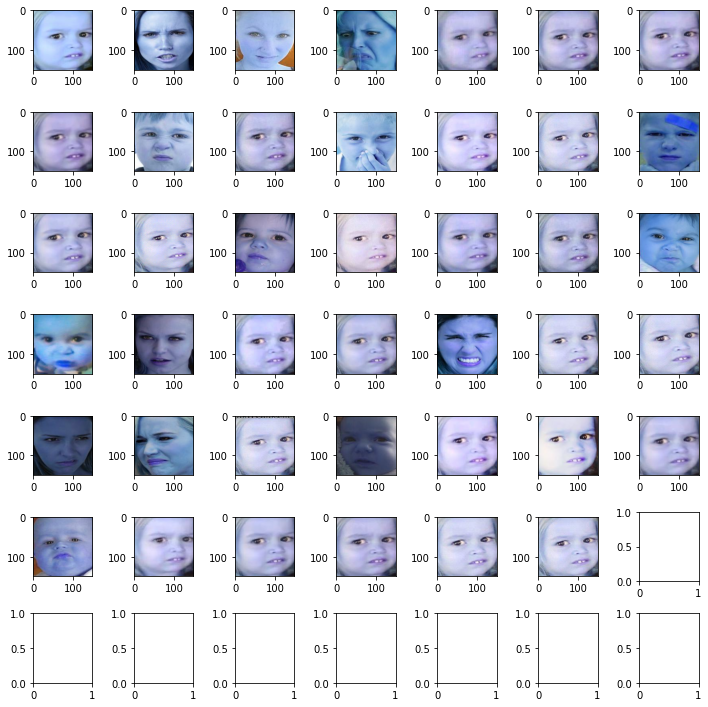

In [9]:
file_name = data.loc[data['Disatance_mean'] < 40, 'File_name'].values

figure = plt.figure(figsize=(10,10))
figure_list = list()
i = 1
for n in range(7):
    for m in range(7):
        figure_list.append(figure.add_subplot(7, 7 ,i))
        i+=1

for idx, fname in enumerate(file_name):
    figure_list[idx].imshow(cv.imread(os.path.join(base_dir, fname)), cmap='gray')

plt.tight_layout()
plt.show()

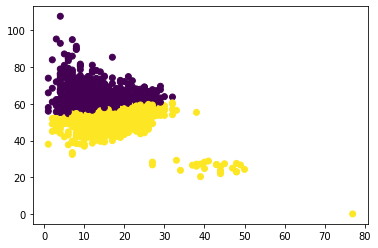

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='random')

pred = kmeans.fit_predict(data[['Disatance_mean', 'Num']].values)
data['pred'] = pred

plt.scatter(data['Num'] ,data['Disatance_mean'],  c=data['pred'])
plt.show()

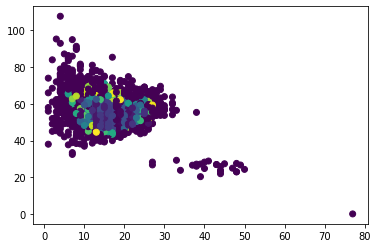

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(algorithm='brute')

pred = model.fit_predict(data[['Disatance_mean', 'Num']].values)
data['pred'] = pred

plt.scatter(data['Num'] ,data['Disatance_mean'],  c=data['pred'])
plt.show()

k-means 클러스터링

In [ ]:
import os
import pandas as pd
from sklearn.cluster import KMeans

raw_data = list()
name_list = list()
for fname in os.listdir(base_dir):
    img = cv.imread(os.path.join(base_dir, fname),cv.IMREAD_GRAYSCALE).ravel()
    raw_data.append(img/255)
    name_list.append(fname)
raw_data = pd.DataFrame(raw_data)
raw_data['name'] = name_list
display(raw_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22461,22462,22463,22464,22465,22466,22467,22468,22469,22470,22471,22472,22473,22474,22475,22476,22477,22478,22479,22480,22481,22482,22483,22484,22485,22486,22487,22488,22489,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499,name
0,0.458824,0.427451,0.282353,0.172549,0.262745,0.364706,0.270588,0.105882,0.101961,0.101961,0.101961,0.098039,0.094118,0.086275,0.082353,0.078431,0.074510,0.086275,0.098039,0.101961,0.094118,0.090196,0.090196,0.094118,0.066667,0.035294,0.050980,0.113725,0.129412,0.090196,0.086275,0.117647,0.105882,0.137255,0.180392,0.215686,0.231373,0.227451,0.219608,0.211765,...,0.231373,0.258824,0.294118,0.345098,0.384314,0.392157,0.380392,0.360784,0.349020,0.317647,0.290196,0.254902,0.235294,0.231373,0.239216,0.239216,0.239216,0.227451,0.223529,0.223529,0.215686,0.211765,0.200000,0.196078,0.188235,0.152941,0.192157,0.254902,0.290196,0.266667,0.203922,0.160784,0.149020,0.160784,0.160784,0.156863,0.152941,0.149020,0.145098,bbe9c10f20c6580c10f63ac8a6173f6fae5dec718d273b...
1,0.984314,0.980392,0.976471,0.972549,0.976471,0.980392,0.988235,0.992157,0.988235,0.992157,0.996078,1.000000,1.000000,1.000000,0.996078,0.992157,0.988235,0.988235,0.988235,0.992157,0.992157,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,0.996078,0.996078,0.992157,0.992157,0.992157,0.996078,1.000000,1.000000,1.000000,1.000000,0.996078,0.992157,0.988235,...,0.431373,0.423529,0.423529,0.419608,0.419608,0.419608,0.419608,0.419608,0.419608,0.427451,0.427451,0.427451,0.431373,0.439216,0.447059,0.458824,0.466667,0.474510,0.482353,0.494118,0.505882,0.517647,0.537255,0.556863,0.576471,0.584314,0.596078,0.611765,0.627451,0.639216,0.650980,0.670588,0.682353,0.682353,0.686275,0.690196,0.694118,0.698039,0.701961,bbf92edd55dd7a6d0421144fd547025f6b3205ffd487c8...
2,0.239216,0.247059,0.258824,0.270588,0.274510,0.258824,0.227451,0.203922,0.211765,0.215686,0.219608,0.215686,0.207843,0.203922,0.207843,0.211765,0.219608,0.239216,0.243137,0.215686,0.203922,0.223529,0.235294,0.231373,0.258824,0.239216,0.227451,0.227451,0.223529,0.211765,0.215686,0.227451,0.278431,0.278431,0.274510,0.270588,0.294118,0.329412,0.341176,0.329412,...,0.317647,0.360784,0.364706,0.400000,0.403922,0.380392,0.396078,0.407843,0.372549,0.396078,0.427451,0.435294,0.411765,0.400000,0.411765,0.403922,0.380392,0.388235,0.396078,0.364706,0.337255,0.317647,0.247059,0.184314,0.188235,0.203922,0.192157,0.196078,0.219608,0.235294,0.243137,0.250980,0.262745,0.278431,0.270588,0.258824,0.250980,0.247059,0.243137,bc27870c0431a83ac0b446a3a22cb9c4453d4280b6b6ae...
3,0.211765,0.215686,0.223529,0.223529,0.219608,0.207843,0.196078,0.188235,0.145098,0.145098,0.145098,0.145098,0.141176,0.141176,0.141176,0.137255,0.203922,0.219608,0.223529,0.203922,0.192157,0.192157,0.184314,0.172549,0.172549,0.176471,0.176471,0.156863,0.133333,0.117647,0.121569,0.129412,0.137255,0.121569,0.105882,0.117647,0.149020,0.180392,0.203922,0.211765,...,0.349020,0.345098,0.356863,0.376471,0.396078,0.407843,0.415686,0.415686,0.415686,0.419608,0.431373,0.447059,0.458824,0.466667,0.482353,0.501961,0.517647,0.505882,0.509804,0.517647,0.529412,0.541176,0.545098,0.549020,0.552941,0.541176,0.541176,0.552941,0.533333,0.564706,0.564706,0.564706,0.721569,0.780392,0.537255,0.262745,0.121569,0.098039,0.101961,bc683d2296322b8721af076b52d51cc269f59dbb2c4c16...
4,0.207843,0.200000,0.196078,0.188235,0.192157,0.196078,0.203922,0.211765,0.196078,0.207843,0.219608,0.219608,0.203922,0.196078,0.196078,0.200000,0.219608,0.258824,0.301961,0.309804,0.286275,0.266667,0.274510,0.294118,0.286275,0.286275,0.282353,0.290196,0.301961,0.321569,0.345098,0.356863,0.364706,0.360784,0.352941,0.349020,0.349020,0.356863,0.368627,0.372549,...,0.482353,0.474510,0.474510,0.470588,0.466667,0.454902,0.443137,0.431373,0.423529,0.396078,0.376471,0.349020,0.321569,0.282353,0.258824,0.266667,0.294118,0.341176,0.356863,0.376471,0.376471,0.364706,0.341176,0.321

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (1998) found smaller than n_clusters (2000). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


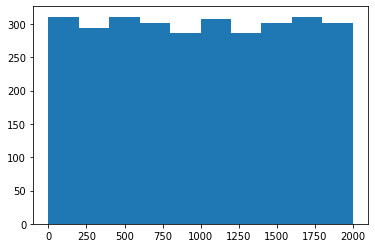

In [ ]:
kmeans = KMeans(n_clusters=1000, init='random')

pred = kmeans.fit_predict(raw_data.drop(columns=['name']).values)
raw_data['pred'] = pred

plt.hist(pred)
plt.show()

In [ ]:
test = raw_data['name'].groupby(raw_data['pred'])
test.size()[test.size() > 1]

pred
9       2
17      3
19      2
24      2
25      3
       ..
1986    3
1987    2
1989    3
1993    5
1997    2
Name: name, Length: 536, dtype: int64

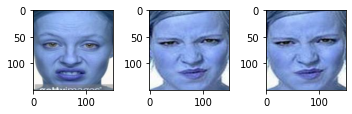

In [ ]:
fig = plt.figure(figsize=(5,5))
fig_list = list()
n = 0
for name in raw_data.loc[raw_data['pred']==1986,'name']:
    fig_list.append(fig.add_subplot(1, raw_data.loc[raw_data['pred']==1986,'name'].count(), n+1))
    img = cv.imread(os.path.join(base_dir, name))
    fig_list[n].imshow(img)
    n+=1

plt.tight_layout()
plt.show()